___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Time Series with Pandas Project Exercise

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Import any necessary libraries.**

In [2]:
# CODE HERE
import pandas as pd
import numpy as np
import pandas.util.testing as tm

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read in the data UMTMVS.csv file from the Data folder**

In [7]:
# CODE HERE
umtm = pd.read_csv('../Data/UMTMVS.csv',index_col='DATE', parse_dates=True)


**Check the head of the data**

In [8]:
# CODE HERE
umtm.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


**Set the DATE column as the index.**

In [48]:
# CODE HERE

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


**Check the data type of the index.**

In [11]:
# CODE HERE
umtm.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

In [53]:
# CODE HERE - Check already done while reading the data

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Plot out the data, choose a reasonable figure size**

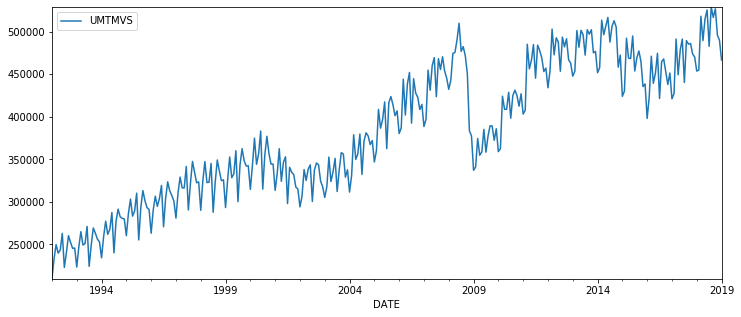

In [14]:
# CODE HERE
ax = umtm.plot(figsize=(12,5))
ax.autoscale(tight=True)

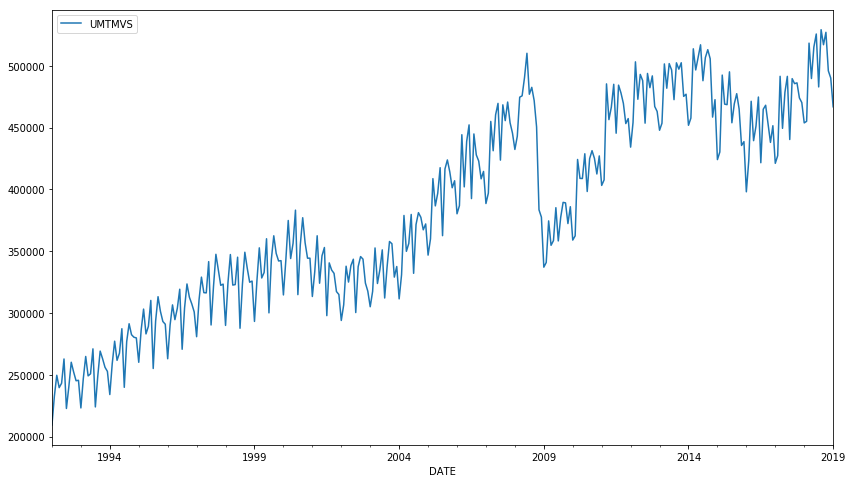

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [24]:
#CODE HERE
(umtm.loc['2019-01-01'] - umtm.loc['2009-01-01']) / (umtm.loc['2009-01-01']) * 100

UMTMVS    38.472149
dtype: float64

UMTMVS    38.472149
dtype: float64

**What was the percent decrease from Jan 2008 to Jan 2009?**

In [25]:
#CODE HERE
(umtm.loc['2009-01-01'] - umtm.loc['2008-01-01']) / (umtm.loc['2008-01-01']) * 100

UMTMVS   -22.022775
dtype: float64

UMTMVS   -22.022775
dtype: float64

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [33]:
#CODE HERE
umtm.loc['2005-01-01':].min()

UMTMVS    337101.0
dtype: float64

In [39]:
umtm.loc['2009-01-01']

UMTMVS    337101.0
Name: 2009-01-01 00:00:00, dtype: float64

In [41]:
umtm.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

UMTMVS   2009-01-01
dtype: datetime64[ns]

**What 6 months have the highest value?**

In [45]:
# CODE HERE
umtm.sort_values(by='UMTMVS',ascending=False).head(5)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0


,UMTMVS,Yearly Mean
DATE,,
2018-08-01,529157.0,490453.500000
2018-10-01,527031.0,496482.333333
2018-06-01,525660.0,483611.000000
2018-03-01,518285.0,474351.250000
2018-09-01,516992.0,493075.583333


**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [47]:
# CODE HERE
(umtm.loc['2008-01-01'] - umtm.loc['2009-01-01'])

UMTMVS    95206.0
dtype: float64

UMTMVS    95206.0
dtype: float64

**Create a bar plot showing the average value in millions of dollars per year**

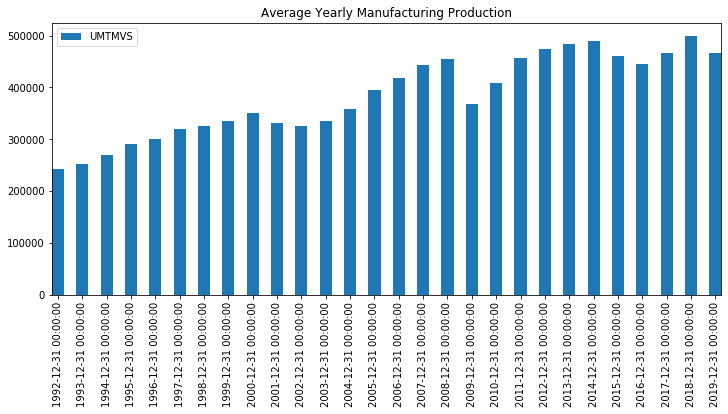

In [57]:
# CODE HERE
from matplotlib import dates
ax = umtm.resample(rule='A').mean().plot.bar(figsize=(12,5))
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='')
ax.set(title='Average Yearly Manufacturing Production')
ax.xaxis.set_minor_locator(dates.YearLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))


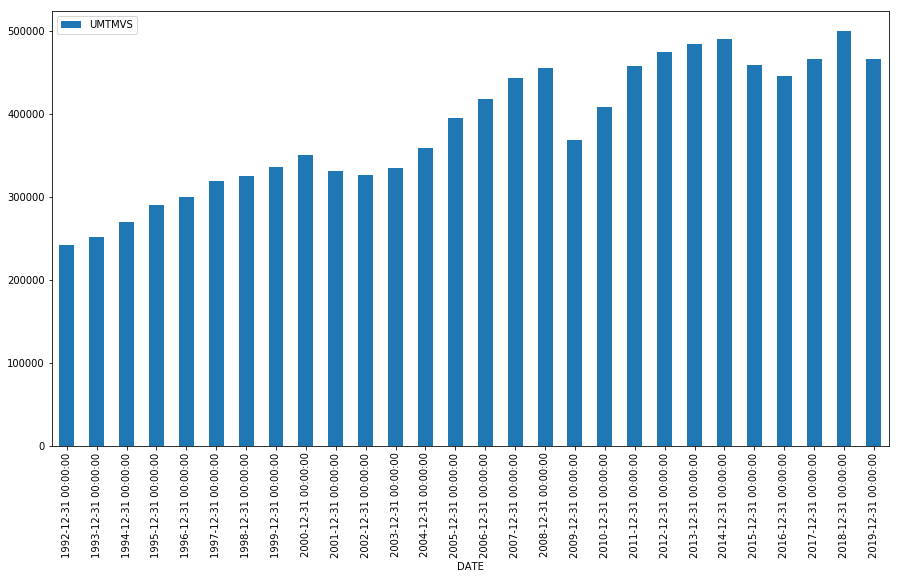

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [78]:
# CODE HERE
Yr = umtm.resample(rule='A').mean()

In [87]:
Yr_shift =  Yr.shift(periods=1) # do not fill with 0, else most likely the first row will be max 

In [88]:
diff = Yr - Yr_shift

In [89]:
diff.idxmax()

UMTMVS   2011-12-31
dtype: datetime64[ns]

,UMTMVS
DATE,
2014-12-31,487387.666667
2018-12-31,483520.250000
2019-12-31,483377.583333
2013-12-31,479436.375000
2015-12-31,475274.125000


,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


Timestamp('2011-12-31 00:00:00', freq='A-DEC')

**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

In [91]:
# CODE HERE
umtm['UMTMVS:Yr_Rolling_Mean']= umtm.rolling(window=12)['UMTMVS'].mean()

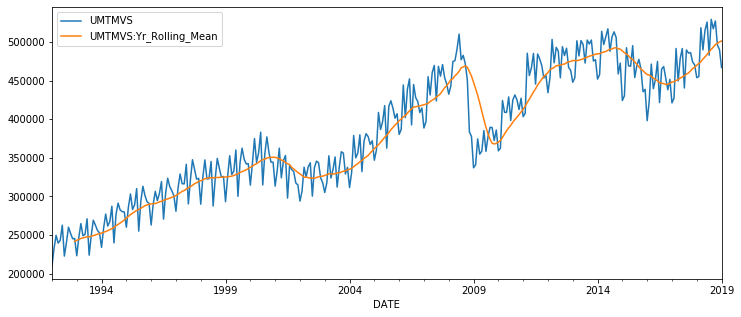

In [92]:
umtm[['UMTMVS','UMTMVS:Yr_Rolling_Mean']].plot(figsize=(12,5))

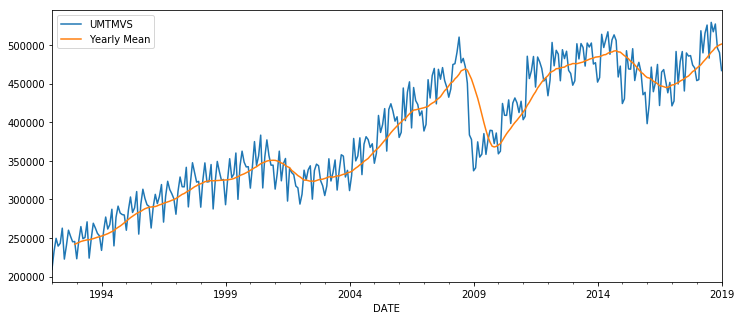

**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [94]:
#CODE HERE
df = pd.read_csv('../Data/UMTMVS.csv',index_col='DATE', parse_dates=True)

In [96]:
df2008 = df['2008-01-01':'2009-01-01']

In [100]:
df2008.idxmax() 

UMTMVS   2008-06-01
dtype: datetime64[ns]

The value peaked in June 2008

In [102]:
df2008.loc['2008-06-01']

UMTMVS    510081.0
Name: 2008-06-01 00:00:00, dtype: float64

In [99]:
df_post2008 = df['2008-06-01':]

In [105]:
df_post2008[df_post2008>510081.0].dropna()

,UMTMVS
DATE,
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0
2018-10-01,527031.0


In [106]:
len(df.loc['2008-06-01':'2014-03-01'])

70

70

# GREAT JOB!